## 인구밀집지역을 Dlib 기반으로 판단하여 알리는 프로그램

In [1]:
import easygui
import numpy as np
import cv2
from distutils.sysconfig import get_python_lib
import matplotlib.pyplot as plt
import dlib
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams['font.family'] = "Gulim"

In [2]:
img_file = easygui.fileopenbox()
img_bgr = cv2.imread(img_file)
### 얼굴 검출 - RGB 영상으로 전환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


In [3]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

In [4]:
### 검출기
landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
### face landmark
list_landmarks = []
### face landmark 검출
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    ### face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


In [5]:
### face landmark 확인
len(list_landmarks)

57

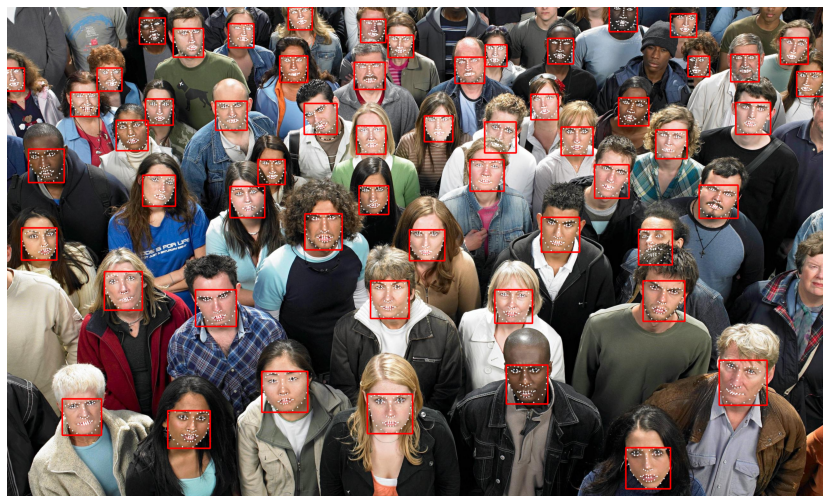

Current Condition:
Very Danger


In [6]:
img_out = img_bgr.copy()

# 얼굴 랜드마크 표시
for landmark in list_landmarks:
    # 얼굴 랜드마크 점 그리기
    for point in landmark:
        cv2.circle(img_out, point, 2, (255, 255, 255), -1)

    # 얼굴 랜드마크 사각형 그리기
    landmark_array = np.array(landmark)
    x, y, w, h = cv2.boundingRect(landmark_array)
    cv2.rectangle(img_out, (x, y), (x + w, y + h), (0, 0, 255), 4)


# 영상 출력
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Current Condition:")
if len(list_landmarks) > 50:
    print("Very Danger")
elif len(list_landmarks) > 30:
    print("Danger")
else:
    print("Safety")

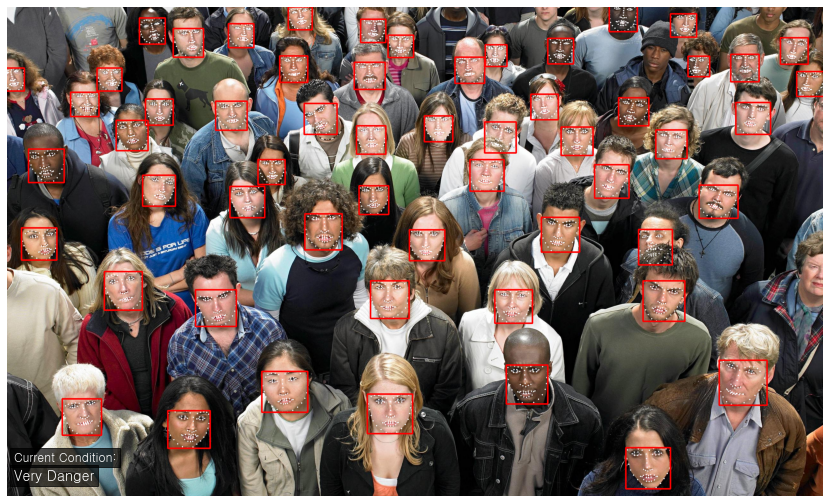

In [7]:
img_out = img_bgr.copy()

# 얼굴 랜드마크 표시
for landmark in list_landmarks:
    # 얼굴 랜드마크 점 그리기
    for point in landmark:
        cv2.circle(img_out, point, 2, (255, 255, 255), -1)

    # 얼굴 랜드마크 사각형 그리기
    landmark_array = np.array(landmark)
    x, y, w, h = cv2.boundingRect(landmark_array)
    cv2.rectangle(img_out, (x, y), (x + w, y + h), (0, 0, 255), 4)

# 영상 출력
fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
ax.axis("off")


# 좌측 하단에 현재 상태를 나타내는 텍스트 박스 생성 및 출력
text_box = dict(facecolor='black', edgecolor='black', alpha=0.7)
condition = ""
if len(list_landmarks) > 50:
    condition = "Very Danger"
elif len(list_landmarks) > 30:
    condition = "Danger"
else:
    condition = "Safety"

ax.text(20, img_out.shape[0] - 110, "Current Condition:", fontsize=12, color='white', bbox=text_box)
ax.text(20, img_out.shape[0] - 50, condition, fontsize=14, color='white', bbox=text_box)

plt.show()
